In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas import read_csv
import math
import seaborn as sns
from pylab import rcParams

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

#Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path = 'gdrive/My Drive/Colab Notebooks/LSTM/Signature Recognition/UserDBKFCG/'
#change dir to your project folder

In [ ]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
DataX = load(root_path +'kfcg.npz')
DataY = load(root_path +'y.npz')
# extract the first array
X = DataX['arr_0']
Y = DataY['arr_0']

In [ ]:
# print the array
print(X)

[[[0.84615385 1.         1.         0.         0.68181818 0.        ]
  [0.84615385 1.         0.97858672 0.         0.72727273 0.        ]
  [0.84615385 1.         0.95717345 0.         0.72727273 0.        ]
  ...
  [1.         0.66666667 0.         0.68439306 0.81818182 1.        ]
  [1.         0.73333333 0.         0.68439306 0.81818182 1.        ]
  [0.96923077 0.73333333 0.         0.6982659  0.90909091 0.90909091]]

 [[1.         1.         1.         0.         0.95454545 0.        ]
  [1.         1.         0.98226164 0.         1.         0.        ]
  [1.         1.         0.95121951 0.         1.         0.        ]
  ...
  [0.47368421 0.9        0.         0.62222222 0.18181818 0.91666667]
  [0.43859649 0.9        0.         0.62037037 0.18181818 0.91666667]
  [0.40350877 0.9        0.         0.61851852 0.18181818 0.91666667]]

 [[0.6875     1.         1.         0.         0.01960784 0.1025641 ]
  [0.6875     1.         0.98390342 0.         0.         0.15384615]
  [0

In [ ]:
print(Y)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(X.shape)
print(Y.shape)

(1006, 128, 6)
(1006, 101)


RESHAPE X  
X has a shape of (128, 6) and each sample in Y has a shape of (101,).

To use this data in a CNN, we reshaped X to have a 4D shape of (samples, height, width, channels), where samples is the number of samples in the data, height is the number of time steps in each sample, width is the number of features in each time step, and channels is 1 (since this is univariate time series data). we used the reshape() function from NumPy:

In [ ]:
import numpy as np

X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2], 1))


In [ ]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




 **Modifying the code to train a LSTM model**
The input data for the LSTM model has 3 dimensions: samples, time steps, and features. In this case, the input shape is (1006, 128, 6), where 1006 represents the number of samples, 128 represents the number of time steps, and 6 represents the number of features.




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import RepeatVector, TimeDistributed

# define the dimensions of the input data
timesteps, features = X.shape[1], X.shape[2]

# define the LSTM model
model =Sequential()
model.add(layers.LSTM(128, input_shape=(timesteps, features)))
model.add(layers.RepeatVector(timesteps))
model.add(layers.LSTM(128, activation='relu', return_sequences=True))
#model.add(layers.TimeDistributed(layers.Dense(101)))
model.add(layers.LSTM(128, activation='relu'))

model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


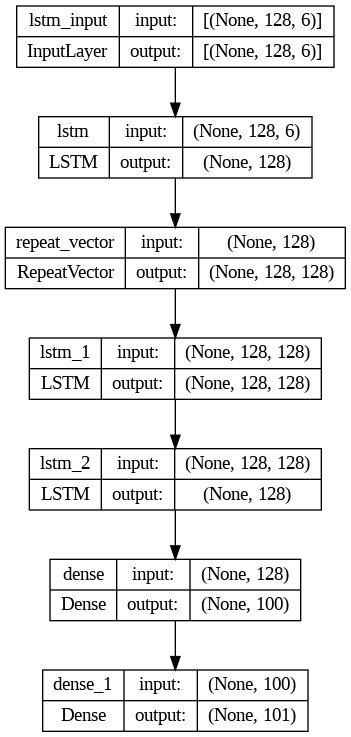

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes= True, show_layer_names= True, to_file='model.png')

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))


Epoch 1/20
26/26 [==============================] - 29s 706ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0198
Epoch 2/20
26/26 [==============================] - 17s 667ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 3/20
26/26 [==============================] - 18s 694ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 4/20
26/26 [==============================] - 18s 680ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 5/20
26/26 [==============================] - 17s 671ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 6/20
26/26 [==============================] - 17s 671ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 7/20
26/26 [==============================] - 19s 746ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 8/20
26/26 [=======================

In [ ]:
# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy*100)

7/7 [==============================] - 1s 82ms/step - loss: nan - accuracy: 0.0198
Test loss: nan
Test accuracy: 1.9801979884505272


In [ ]:
n_batch = 1
n_epoch = 20
history = model.fit(X_train, Y_train, epochs=n_epoch)

Epoch 1/20
26/26 [==============================] - 17s 656ms/step - loss: nan - accuracy: 0.0075
Epoch 2/20
26/26 [==============================] - 19s 720ms/step - loss: nan - accuracy: 0.0075
Epoch 3/20
26/26 [==============================] - 17s 641ms/step - loss: nan - accuracy: 0.0075
Epoch 4/20
14/26 [===============>..............] - ETA: 6s - loss: nan - accuracy: 0.0022

KeyboardInterrupt: ignored

In [ ]:
# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy*100)

7/7 [==============================] - 0s 53ms/step - loss: nan - accuracy: 0.0198
Test loss: nan
Test accuracy: 1.9801979884505272


plot training history of a LSTM model

Epoch 1/10
26/26 [==============================] - 18s 683ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 2/10
26/26 [==============================] - 18s 701ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 3/10
26/26 [==============================] - 18s 672ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 4/10
26/26 [==============================] - 17s 667ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 5/10
26/26 [==============================] - 17s 671ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 6/10
26/26 [==============================] - 19s 748ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 7/10
26/26 [==============================] - 17s 671ms/step - loss: nan - accuracy: 0.0075 - val_loss: nan - val_accuracy: 0.0198
Epoch 8/10
26/26 [=======================

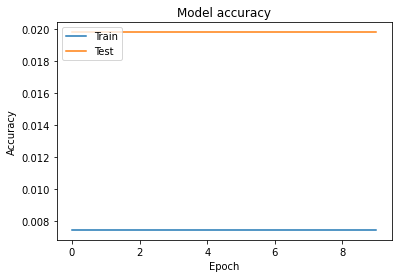

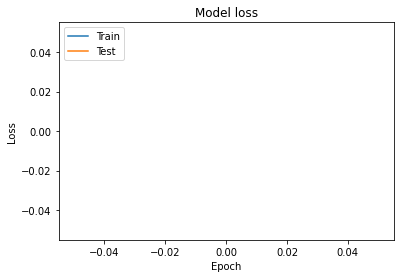

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
